Course Reference: https://learn.microsoft.com/en-us/training/modules/intro-machine-learning-pytorch/8-quickstart
#### Learning objectives

In this module you will:

* Learn how create a asimple CNN using pytorch

## Imports

In [64]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader
import torchvision.datasets as datasets
import torchvision.transforms as transformations

## Create a CNN Network 

We define our neural network by subclassing nn.Module, and initialize the neural network layers in __init__. Every nn.Module subclass implements the operations on input data in the forward method.

In [65]:
# Import nn module
# Init super class
# input  -> input channels
# design a CONV layer
# Check output size at each layer using pseudo forwaard
# Add a max pool layer
# what is the output of the maxpool?
# conv 2
# Fc1
# Forward pass operations

In [66]:
class SimpleCnn(nn.Module):
    def __init__(self, input_channel, output_class):
        super(SimpleCnn, self).__init__()

        # CNN layers
        self.conv_layer_1 = nn.Conv2d(
            in_channels=input_channel,
            out_channels=8,
            kernel_size=(3, 3),
            padding=(1, 1),
            stride=(1, 1),
        )

        self.pool_layer = nn.MaxPool2d(kernel_size=(2, 2), stride=(2, 2))

        self.conv_layer_2 = nn.Conv2d(
            in_channels=8,
            out_channels=16,
            kernel_size=(3, 3),
            padding=(1, 1),
            stride=(1, 1),
        )
    
        self.fc1 = nn.Linear(in_features=16*7*7, out_features=output_class)

    def forward(self, x):
        x = F.relu(self.conv_layer_1(x))
        x = self.pool_layer(x)
        x = F.relu(self.conv_layer_2(x))
        x = self.pool_layer(x)
        x = x.flatten(1,-1)
        x = self.fc1(x)

        return x

In [67]:
# check the network graph
model = SimpleCnn(1, 10)

# create a random variable and pass it to the model to check the network graph
x = torch.randn(60, 1, 28, 28)
print(x.shape)
print(model(x).shape)

torch.Size([60, 1, 28, 28])
torch.Size([60, 10])


## Set device

In [68]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


## HyperParameters

In [69]:
input_channel = 1
n_class = 10
learning_rate = 0.001
batch_size = 64
num_epochs = 5

## Load Data

In [70]:
# download and load the data from pytorch sample datasets
# https://pytorch.org/vision/0.8/datasets.html

train_dataset = datasets.MNIST(
    root="../dataset/", train=True, transform=transformations.ToTensor(), download=True
)
train_datloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


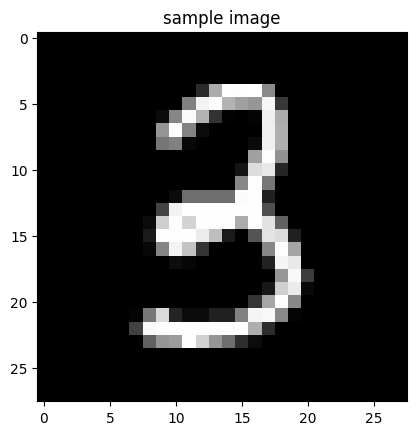

Label: 3


In [71]:
import matplotlib.pyplot as plt

# Understand the dataloader
plt.title("sample image")
# Display image and label.
train_features, train_labels = next(iter(train_datloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

In [72]:
# train data shape and class labels
print("train_dataset shape:", train_dataset.data.shape)
print(train_dataset.classes)

train_dataset shape: torch.Size([60000, 28, 28])
['0 - zero', '1 - one', '2 - two', '3 - three', '4 - four', '5 - five', '6 - six', '7 - seven', '8 - eight', '9 - nine']


In [73]:
test_dataset = datasets.MNIST(
    root="../dataset/", train=False, transform=transformations.ToTensor(), download=True
)
test_datloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

print("test_dataset shape:", test_dataset.data.shape)
print(test_dataset.classes)

test_dataset shape: torch.Size([10000, 28, 28])
['0 - zero', '1 - one', '2 - two', '3 - three', '4 - four', '5 - five', '6 - six', '7 - seven', '8 - eight', '9 - nine']


## Initialise Network


In [74]:
model = SimpleCnn(input_channel, n_class)
print(model)

SimpleCnn(
  (conv_layer_1): Conv2d(1, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool_layer): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (conv_layer_2): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=784, out_features=10, bias=True)
)


## Initialise Loss And Optimizer

In [75]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

## Train Network

#### Steps to train the model
1. For each epoch, iterate through the batch
2. For each batch
    * feed forward the input and target data of train to the model
    * Calculate the loss and score
    * Backpropogate the loss
    * optimise the loss using optimiser() (gradient descent is one such optimiser) 


In [76]:
%%time

# get model to cuda if possible
model = model.to(device)

for epoch in range(num_epochs):
    for batch_idx, (data, target) in enumerate((train_datloader)):

        # get data to cuda if possible
        data = data.to(device)
        target = target.to(device)

        # feed forward the data to model
        scores = model(data)
        loss = criterion(scores, target)
        print(f"epoch: {epoch}, batch: {batch_idx}, loss: {loss}")
        
        # Backpropagation
        optimizer.zero_grad() # This will flush the gradients from the last iteration
        loss.backward()

        # optimise the loss (gradient descent or Adam step)
        optimizer.step()


epoch: 0, batch: 0, loss: 2.29600191116333
epoch: 0, batch: 1, loss: 2.2864458560943604
epoch: 0, batch: 2, loss: 2.3019285202026367
epoch: 0, batch: 3, loss: 2.3110599517822266
epoch: 0, batch: 4, loss: 2.295490026473999
epoch: 0, batch: 5, loss: 2.296154260635376
epoch: 0, batch: 6, loss: 2.286017417907715
epoch: 0, batch: 7, loss: 2.260921001434326
epoch: 0, batch: 8, loss: 2.2701685428619385
epoch: 0, batch: 9, loss: 2.2430338859558105
epoch: 0, batch: 10, loss: 2.2481653690338135
epoch: 0, batch: 11, loss: 2.24849009513855
epoch: 0, batch: 12, loss: 2.221688747406006
epoch: 0, batch: 13, loss: 2.2503716945648193
epoch: 0, batch: 14, loss: 2.224527597427368
epoch: 0, batch: 15, loss: 2.2003748416900635
epoch: 0, batch: 16, loss: 2.189391613006592
epoch: 0, batch: 17, loss: 2.18888783454895
epoch: 0, batch: 18, loss: 2.1638879776000977
epoch: 0, batch: 19, loss: 2.1706151962280273
epoch: 0, batch: 20, loss: 2.129042625427246
epoch: 0, batch: 21, loss: 2.14713978767395
epoch: 0, batc

## Check accuracy on train and test data (Validate model accuracy)

In [77]:
# Check accuracy on training & test to see how good our model
def check_accuracy(loader, model):
    """
    Check accuracy of our trained model given a loader and a model

    Parameters:
        loader: torch.utils.data.DataLoader
            A loader for the dataset you want to check accuracy on
        model: nn.Module
            The model you want to check accuracy on

    Returns:
        acc: float
            The accuracy of the model on the dataset given by the loader
    """

    num_correct = 0
    num_samples = 0
    model.eval()

    # We don't need to keep track of gradients here so we wrap it in torch.no_grad()
    with torch.no_grad():
        # Loop through the data
        for x, y in loader:
            # Move data to device
            x = x.to(device=device)
            y = y.to(device=device)

            # Forward pass
            scores = model(x)
            predictions = scores.argmax(1)

            # Check how many we got correct
            num_correct += (predictions == y).sum()

            # Keep track of number of samples
            num_samples += predictions.size(0)

    model.train()
    return num_correct / num_samples

In [78]:
# Check accuracy on training & test to see how good our model
print(f"Accuracy on training set: {check_accuracy(train_datloader, model)*100:.2f}")
print(f"Accuracy on test set: {check_accuracy(test_datloader, model)*100:.2f}")

Accuracy on training set: 98.66
Accuracy on test set: 98.38
